In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4

     |████████████████████████████████| 6.3 MB 8.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=a5e90feaae16b72fa40896e3881e26ecbf1399e3763a42b8a526245f6837e290
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 240 kB 5.1 MB/s 
     |████████████████████████████████| 1.4 MB 9.6 MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065372 sha256=3967319a5266de92cf873c4ebc9dddc56bff25a7b9ed11e6b9bdcf337300f646
  Stored in directory: /root/.cache/pip/wheels/da/37/ee/8d5c9166a378bb0b661bf4257b8e1ef8d79d879b931534fb98
Successfully built mpi4py
     |████████████████████████████████| 110.5 MB 48 kB/s 
     |███████████████████████████████

In [1]:
import yfinance as yf
from stockstats import StockDataFrame as Sdf

import pandas as pd
import matplotlib.pyplot as plt

import gym
from stable_baselines import PPO2, DDPG, A2C, ACKTR, TD3
from stable_baselines import DDPG
from stable_baselines import A2C
from stable_baselines import SAC
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download and save the data in a pandas DataFrame:
data_df = yf.download("WIPRO.NS", start="2006-01-01", end="2021-06-23")

[*********************100%***********************]  1 of 1 completed


In [4]:
data_df.shape

(3806, 6)

In [5]:
# reset the index, we want to use numbers instead of dates
data_df=data_df.reset_index()

In [6]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-02,103.950005,104.512505,102.442505,103.882507,88.161591,2869693
1,2006-01-03,103.725006,107.100006,103.140007,106.425003,90.319321,5113093
2,2006-01-04,106.987503,109.125008,106.987503,108.247505,91.866013,5118510
3,2006-01-05,108.450005,108.900002,106.256256,106.661255,90.519829,3731715
4,2006-01-06,106.875008,106.875008,101.475006,106.357506,90.262024,4419382


In [7]:
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# convert the column names to standardized names
data_df.columns = ['datadate','open','high','low','close','adjcp','volume']

In [9]:
# check missing data 
data_df.isnull().values.any()

False

In [10]:
# calculate technical indicators like MACD
stock = Sdf.retype(data_df.copy())
# we need to use adjusted close price instead of close price
stock['close'] = stock['adjcp']
data_df['macd'] = stock['macd']

In [11]:
# check missing data again
data_df.isnull().values.any()

False

In [12]:
data_df.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,103.950005,104.512505,102.442505,103.882507,88.161591,2869693,0.000000
1,2006-01-03,103.725006,107.100006,103.140007,106.425003,90.319321,5113093,0.048411
2,2006-01-04,106.987503,109.125008,106.987503,108.247505,91.866013,5118510,0.109648
3,2006-01-05,108.450005,108.900002,106.256256,106.661255,90.519829,3731715,0.086209
4,2006-01-06,106.875008,106.875008,101.475006,106.357506,90.262024,4419382,0.061399


In [13]:
data_clean = data_df.copy()

In [14]:
data_clean.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,103.950005,104.512505,102.442505,103.882507,88.161591,2869693,0.000000
1,2006-01-03,103.725006,107.100006,103.140007,106.425003,90.319321,5113093,0.048411
2,2006-01-04,106.987503,109.125008,106.987503,108.247505,91.866013,5118510,0.109648
3,2006-01-05,108.450005,108.900002,106.256256,106.661255,90.519829,3731715,0.086209
4,2006-01-06,106.875008,106.875008,101.475006,106.357506,90.262024,4419382,0.061399


In [15]:
data_clean.tail()

,datadate,open,high,low,close,adjcp,volume,macd
3801,2021-06-16,559.900024,562.549988,553.500000,555.250000,555.250000,5497269,15.880380
3802,2021-06-17,552.500000,561.500000,549.549988,558.700012,558.700012,4399348,15.512575
3803,2021-06-18,560.000000,561.950012,546.049988,549.799988,549.799988,10007116,14.337654
3804,2021-06-21,544.750000,544.750000,535.200012,542.150024,542.150024,5390821,12.643486
3805,2021-06-22,545.250000,559.950012,542.299988,556.549988,556.549988,5752921,12.320776


In [25]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Global variables
HMAX_NORMALIZE = 200
INITIAL_ACCOUNT_BALANCE=100000
STOCK_DIM = 1

# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001
# REWARD_SCALING = 1e-3


class SingleStockEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        # date increment
        self.day = day
        self.df = df
        # action_space normalization and the shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 4: [Current Balance]+[prices]+[owned shares] +[macd] 
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (4,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        # termination
        self.terminal = False  
        # save the total number of trades
        self.trades = 0
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd] 
        # initialize reward and cost
        self.reward = 0
        self.cost = 0
        
        # memorize the total value, total rewards
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []

    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            # update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)
            # update held shares
            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            # update transaction costs
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass
            
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)
        # update held shares
        self.state[index+STOCK_DIM+1] += min(available_amount, action)
        # update transaction costs
        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('/content/drive/MyDrive/WIPRO/account_value_TD3RS1.png')
            plt.close()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0])) 
            print("end_total_asset:{}".format(end_total_asset))
            
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('/content/drive/MyDrive/WIPRO/account_value_TD3RS1.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))- INITIAL_ACCOUNT_BALANCE ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)
            
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            
            if df_total_value['daily_return'].std()!=0:
                sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                      df_total_value['daily_return'].std()
                print("Sharpe: ",sharpe)
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('/content/drive/MyDrive/WIPRO/account_rewards_A2CRS1.csv')
            return self.state, self.reward, self.terminal,{}

        else:
            
            # actions are the shares we need to buy, hold, or sell
            actions = actions * HMAX_NORMALIZE
            # calculate begining total asset
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            
            # perform buy or sell action
            argsort_actions = np.argsort(actions)
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])
            
            # update data, walk a step s'
            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            self.state =  [self.state[0]] + \
                          [self.data.adjcp] + \
                          list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) +\
                          [self.data.macd]
                        
            # calculate the end total asset
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            #self.reward = self.reward * REWARD_SCALING
            self.asset_memory.append(end_total_asset)

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd]
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [17]:
train = data_clean[(data_clean.datadate>='2006-01-01') & (data_clean.datadate<'2019-01-01')]
# the index needs to start from 0
train=train.reset_index(drop=True)

In [18]:
train.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,103.950005,104.512505,102.442505,103.882507,88.161591,2869693,0.000000
1,2006-01-03,103.725006,107.100006,103.140007,106.425003,90.319321,5113093,0.048411
2,2006-01-04,106.987503,109.125008,106.987503,108.247505,91.866013,5118510,0.109648
3,2006-01-05,108.450005,108.900002,106.256256,106.661255,90.519829,3731715,0.086209
4,2006-01-06,106.875008,106.875008,101.475006,106.357506,90.262024,4419382,0.061399


In [19]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ppo = PPO2('MlpPolicy', env_train, tensorboard_log="/content/drive/MyDrive/WIPRO/single_stock_trading_2_tensorboard/")
model_ppo.learn(total_timesteps=100000,tb_log_name="run_aapl_ppo")
model_ppo.save('/content/drive/MyDrive/WIPRO/AIML-PPO-RS')





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




previous_total_asset:100000
end_total_asset:248031.94248218864
total_reward:148031.94248218864
total_cost:  48669.345817044436
total trades:  3153
Sharpe:  0.45100317498198433

previous_total_asset:100000
end_total_asset:186419.11238164612
total_reward:86419.11238164612
total_cost:  47492.07298379553
total trades:  3170
Sharpe:  0.32363661578445774
previous_total_asset:100000
end_total_asset:250928.04552626636
total_reward:150928.04552626636
total_cost:  49340.782872117474
total trades:  3164
Sharpe:  0.42061238296622167
previous_total_asset:100000
end_total_asset:222359.25159574026
total_reward:122359.25159574026
total_cost:  43030.748388077845
total trades:  3197
Sharpe:  0.3627182702605643
previous_total_asset:100000
end_total_asset:179156.580683647

In [22]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ddpg = DDPG('MlpPolicy', env_train, tensorboard_log="/content/drive/MyDrive/WIPRO/single_stock_trading_2_tensorboard/")
model_ddpg.learn(total_timesteps=100000, tb_log_name="run_aapl_ddpg")
model_ddpg.save('/content/drive/MyDrive/WIPRO/AIML-DDPG-RS')

previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100003.9098252791
total_reward:3.9098252791009145
total_cost:  1.2987715122857482
total trades:  6
Sharpe:  0.13660535999478907
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0


KeyboardInterrupt: ignored

In [24]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_a2c = A2C('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_a2c.learn(total_timesteps=100000,tb_log_name="run_aapl_a2c")
model_a2c.save('/content/drive/MyDrive/WIPRO/AIML-A2C-RS1')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
previous_total_asset:100000
end_total_asset:39710.32840546837
total_reward:-60289.67159453163
total_cost:  29707.734095720447
total trades:  2948
Sharpe:  -0.2569642518992703
previous_total_asset:100000
end_total_asset:165042.58088943077
total_reward:65042.58088943077
total_cost:  30549.102722875246
total trades:  3174
Sharpe:  0.2829923219014844
previous_total_asset:100000
end_total_asset:260413.87811667728
total_reward:160413.87811667728
total_cost:  7696.393429554554
total trades:  3197
Sharpe:  0.39572352803024036
previous_total_asset:100000
end_total_asset:278476.7095990286
total_reward:178476.70959902857
total_cost:  760.0623510933459
total trades:  3197
Sharpe:  0.4111007616430561
previous_total_asset:100000
end_total_asset:265895.1191885659
total_reward:165895.11918856588
total_cost:  4048.8831834760203
total trades:  3197
Sharpe:  0.3999164311764264
previous_t

In [26]:
#tensorboard --logdir ./single_stock_tensorboard/
#DQN<DDPG<TD3
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_td3_new = TD3('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_td3_new.learn(total_timesteps=100000,tb_log_name="run_aapl_td3")
model_td3_new.save('/content/drive/MyDrive/WIPRO/AIML-TD3RS')

previous_total_asset:100000
end_total_asset:87454.65730383083
total_reward:-12545.342696169173
total_cost:  782.0303671825408
total trades:  100
Sharpe:  -0.15063100451517475
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0
previous_total_asset:100000
end_total_asset:100000.0
total_reward:0.0
total_cost:  0
total trades:  0


KeyboardInterrupt: ignored

In [27]:
test = data_clean[(data_clean.datadate>='2019-01-01') ]
# the index needs to start from 0
test=test.reset_index(drop=True)

In [28]:
model = model_ppo
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:183539.2859552155
total_reward:83539.28595521551
total_cost:  14710.610858634596
total trades:  597
Sharpe:  1.1372894593065384


In [29]:
model = model_a2c
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:230678.35687364772
total_reward:130678.35687364772
total_cost:  167.77723413829253
total trades:  607
Sharpe:  1.2400759574782096


In [33]:
def get_DRL_sharpe():
    df_total_value=pd.read_csv('/content/drive/MyDrive/WIPRO/account_value_A2CRS1.csv',index_col=0)
    df_total_value.columns = ['account_value']
    df_total_value['daily_return']=df_total_value.pct_change(1)
    print(df_total_value)
    sharpe = (252**0.5)*df_total_value['daily_return'].mean()/df_total_value['daily_return'].std()
    
    annual_return = ((df_total_value['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df_total_value

In [34]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/ \
    test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)

    print("sharpe ratio: ", sharpe)
    return sharpe

In [35]:
df_total_value=get_DRL_sharpe()

      account_value  daily_return
0     100000.000000           NaN
1     100413.913702      0.004139
2     101014.526596      0.005981
3     100188.443127     -0.008178
4      99964.095265     -0.002239
...             ...           ...
3193  269517.929611      0.014281
3194  269064.214401     -0.001683
3195  270136.664505      0.003986
3196  272281.564712      0.007940
3197  272941.541824      0.002424

[3198 rows x 2 columns]
annual return:  14.07231991573148
sharpe ratio:  0.40613833189369275


In [36]:
get_buy_and_hold_sharpe(test)

annual return:  48.445321961901634
sharpe ratio:  1.2307514803192285


1.2307514803192285

In [37]:
DRL_cumulative_return = (df_total_value.account_value.pct_change(1)+1).cumprod()-1
buy_and_hold_cumulative_return = (test.adjcp.pct_change(1)+1).cumprod()-1

ValueError: ignored

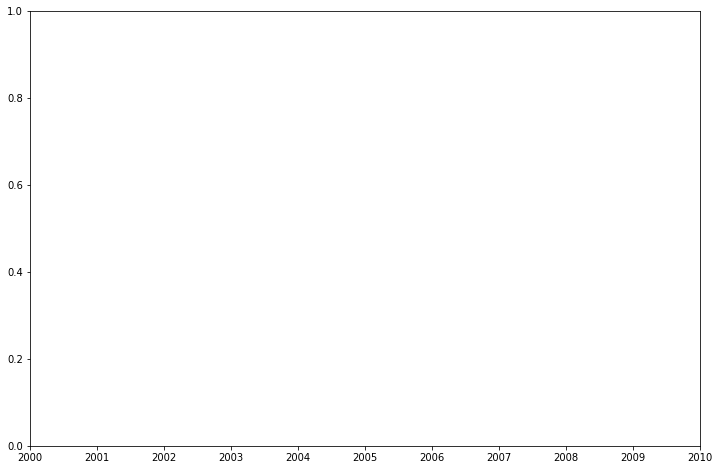

In [38]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(test.datadate, DRL_cumulative_return, color='red',label = "DRL")
plt.plot(test.datadate, buy_and_hold_cumulative_return, label = "Buy & Hold")
plt.title("Cumulative Return for WIPRO with Transaction Cost",size= 18)
plt.legend()
plt.rc('legend',fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)